In [42]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [52]:

#CHOOSE THE CONDITION
#a='../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_0pA_e23_0pA_e6_0pA' #Folder where the spikes files for input condition 
a='../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_0pA_e23_0pA_e6_0pA' #FF
#a='../simulations_data/REVISIONS_1/Sp_input_e4_0pA_e5_150pA_e23_0pA_e6_0pA' #FB
#a='../simulations_data/REVISIONS_1/Sp_input_e4_150pA_e5_150pA_e23_0pA_e6_0pA' #FF + FB 

In [53]:
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

In [54]:
#Function for computation of the firing rates from spikes 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000 #Initial time you want to start computing the rates from (of the total lenght of the simulation time)
    all_time=fin*1000 #Final time you want to finish to compute the rates
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates  

In [55]:
#Function to compute the power spectrum
def power_spectrum(LFP,sec):
    data = LFP
    #print(len(data))
    #le ampiezze non sono relative alle freq in hertz ma al numero di oscillazionin complete nel mio intervallo
    #il primo numero dell'array e' l'ampiezza della frequenza che ci sta una volta (onda che fa 1 giro nell'intervallo), 
    #il secondo numero e' l'ampiezza della frequenza che ci sta due volte (l'onda fa il giro completo 2 volte)
    fourier_transform = np.fft.rfft(data)
    abs_fourier_transform = np.abs(fourier_transform)
    power_spectrum = np.square(abs_fourier_transform)
    #print(fourier_transform[0:100])
    #print(len(fourier_transform)) #Circa meta' della lunghezza della mia time series da analizzare
    #print(power_spectrum)
    # x divided by the time in s of my simulation to obtain Hz (sec is given to the function)
    frequency=[x/sec for x in range(0,len(power_spectrum))]

    return frequency, power_spectrum

In [56]:
# Compute the rates 
# (Now is commented because I already saved in folders, I upload the files below)
# If you want to recompute uncomment the following
iniz=0.5
fin=3
window=200
step=1
# rates_e23_s=rates(S_e23t,iniz,fin,window,step)
# rates_e4_s=rates(S_e4t,iniz,fin,window,step)
# rates_e5_s=rates(S_e5t,iniz,fin,window,step)
# rates_e6_s=rates(S_e6t,iniz,fin,window,step)


rates_pv23_s=rates(S_pv23t,iniz,fin,window,step)
rates_pv4_s=rates(S_pv4t,iniz,fin,window,step)
rates_pv5_s=rates(S_pv5t,iniz,fin,window,step)
rates_pv6_s=rates(S_pv6t,iniz,fin,window,step)



In [58]:
#I save the data in a folder (depending on the one I do) 

#save_folder='rate_200_1_3sec'
#save_folder='rate_200_1_2.5sec'

save_folder='rate_200_1_2.5sec_pv'


#CHOOSE THE CONDITION
#condition= 'spont' 
condition= 'FF' 
#condition= 'FB' 
#condition= 'FF+FB' 



#The one with 3sec is the one receiving the input at 700ms

# np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_e23', rates_e23_s)
# np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_e4', rates_e4_s)
# np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_e5', rates_e5_s)
# np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_e6', rates_e6_s)



np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_pv23', rates_pv23_s)
np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_pv4', rates_pv4_s)
np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_pv5', rates_pv5_s)
np.save('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+save_folder+'/r_pv6', rates_pv6_s)


In [49]:
#I upload the file I saved

# saved_folder='rate_200_1_2.5sec'

# r_e23=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_e23.npy')
# r_e4=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_e4.npy')
# r_e5=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_e5.npy')
# r_e6=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_e6.npy')

In [59]:
#I upload the file I saved

saved_folder='rate_200_1_2.5sec_pv'

r_pv23=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_pv23.npy')
r_pv4=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_pv4.npy')
r_pv5=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_pv5.npy')
r_pv6=np.load('../simulations_data/REVISIONS_1/RATE_FILE_SAVED/'+condition+'/'+saved_folder+'/r_pv6.npy')

In [50]:
#sec=3
# sec=2.5
# freq23,power_sp23=power_spectrum(r_e23,sec)
# freq4,power_sp4=power_spectrum(r_e4,sec)
# freq5,power_sp5=power_spectrum(r_e5,sec)
# freq6,power_sp6=power_spectrum(r_e6,sec)

sec=2.5
freq23,power_sp23=power_spectrum(r_pv23,sec)
freq4,power_sp4=power_spectrum(r_pv4,sec)
freq5,power_sp5=power_spectrum(r_pv5,sec)
freq6,power_sp6=power_spectrum(r_pv6,sec)





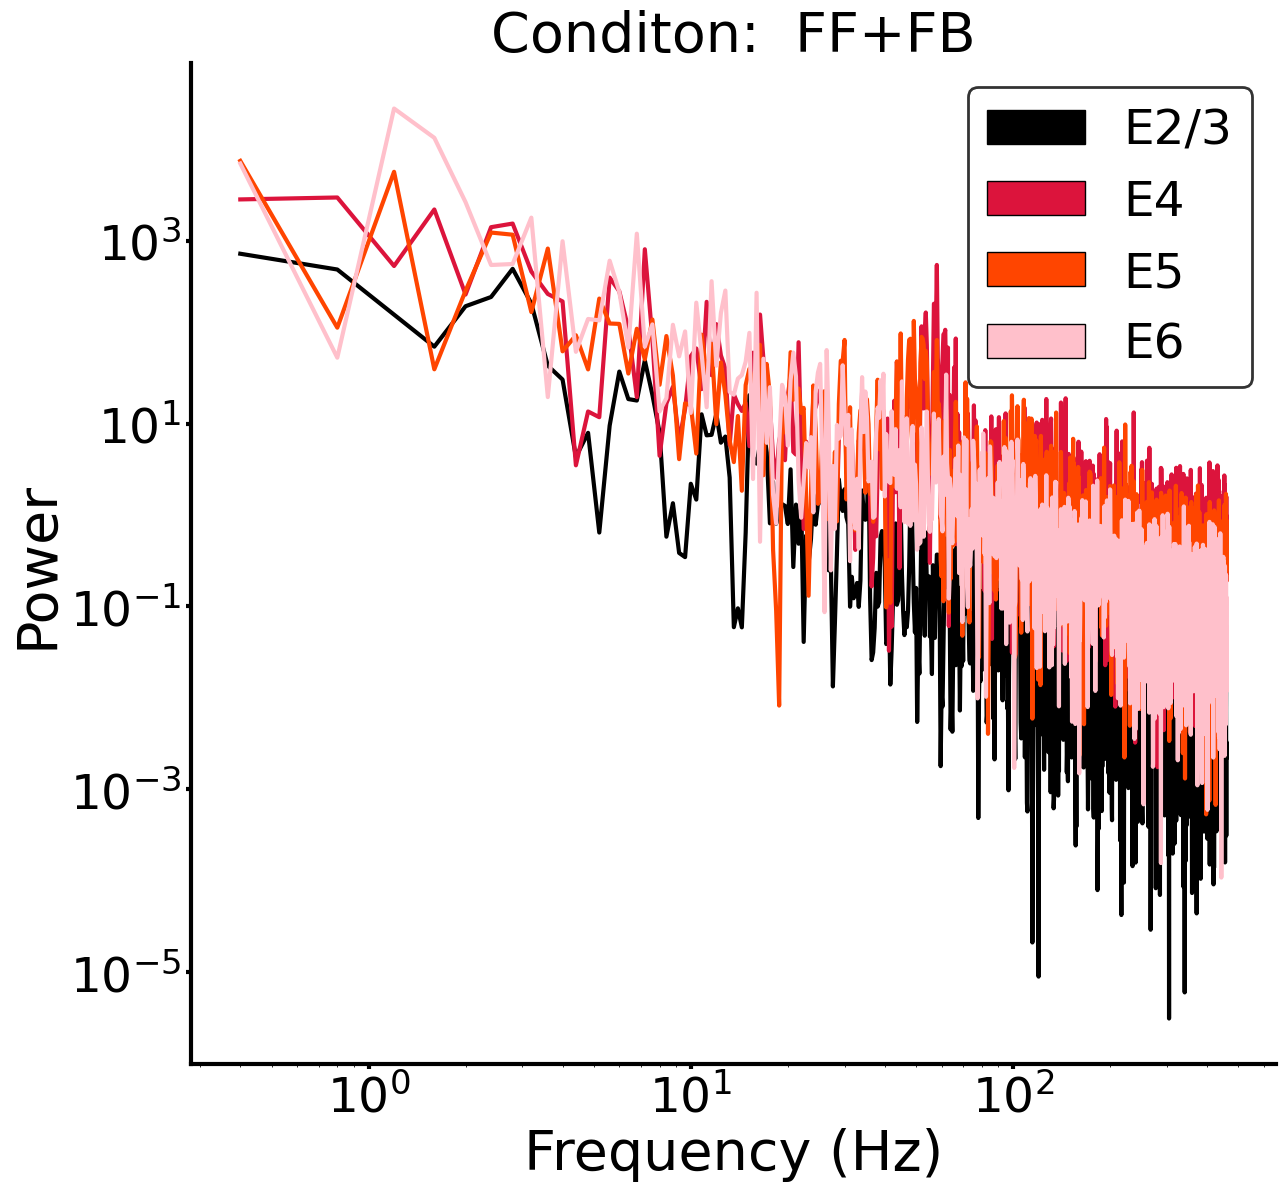

In [51]:
#Create figure
fig, ax = plt.subplots(figsize=(14,13))
#Plot data 
plt.plot(freq23[1:], power_sp23[1:],linewidth=3,label='E2/3',color='k')
plt.plot(freq4[1:], power_sp4[1:],linewidth=3,label='E4',color='crimson')
plt.plot(freq5[1:], power_sp5[1:],linewidth=3,label='E5',color='orangered')
plt.plot(freq6[1:], power_sp6[1:],linewidth=3,label='E6',color='pink')

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
#Ticks size, layout axes etc
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,200)
#plt.ylim(0,10**8)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.title('Conditon:  '+str(condition),fontsize=40)
#plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

#Customize legend
legend_elements1 = [
           Patch(facecolor='k',alpha=1, edgecolor='k',
                 label='E2/3'),
               Patch(facecolor='crimson',alpha=1, edgecolor='k',
                 label='E4'),
           Patch(facecolor='orangered',alpha=1, edgecolor='k',
                 label='E5'),
            Patch(facecolor='pink',alpha=1, edgecolor='k',
                 label='E6')]
#Call legend
l1=plt.legend(handles=legend_elements1, loc='best',fontsize=35)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_spont2.5.png',  bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FF2.5.png',  bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FB2.5.png',  bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FF+FB2.5.png',  bbox_inches='tight')



#Show fig
plt.show()

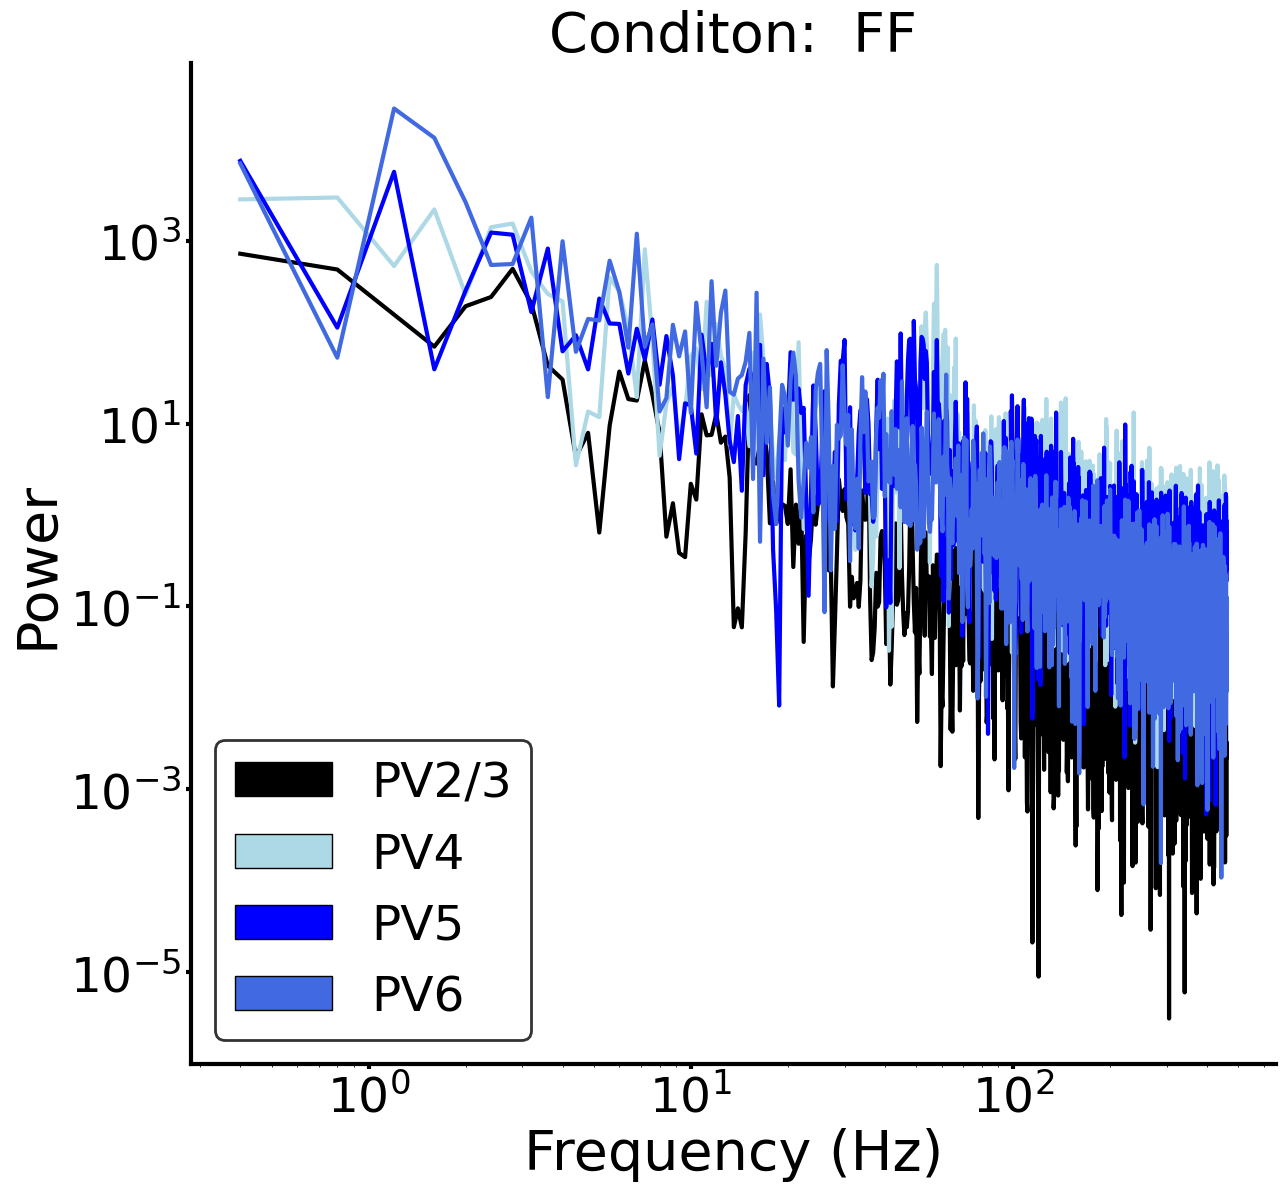

In [62]:
#Create figure
fig, ax = plt.subplots(figsize=(14,13))
#Plot data 
plt.plot(freq23[1:], power_sp23[1:],linewidth=3,label='PV2/3',color='k')
plt.plot(freq4[1:], power_sp4[1:],linewidth=3,label='PV4',color='lightblue')
plt.plot(freq5[1:], power_sp5[1:],linewidth=3,label='PV5',color='blue')
plt.plot(freq6[1:], power_sp6[1:],linewidth=3,label='PV6',color='royalblue')

#Layout
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)
#Ticks size, layout axes etc
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,200)
#plt.ylim(0,10**8)
plt.xticks(size=35)
plt.yticks(size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
plt.xlabel('Frequency (Hz)',fontsize=40)
plt.ylabel('Power',fontsize=40)
plt.title('Conditon:  '+str(condition),fontsize=40)
#plt.locator_params(axis='x', nbins=5)
#plt.locator_params(axis='y', nbins=5)

#Customize legend
legend_elements1 = [
           Patch(facecolor='k',alpha=1, edgecolor='k',
                 label='PV2/3'),
               Patch(facecolor='lightblue',alpha=1, edgecolor='k',
                 label='PV4'),
           Patch(facecolor='blue',alpha=1, edgecolor='k',
                 label='PV5'),
            Patch(facecolor='royalblue',alpha=1, edgecolor='k',
                 label='PV6')]
#Call legend
l1=plt.legend(handles=legend_elements1, loc='best',fontsize=35)
l1.get_frame().set_linewidth(2.0)
l1.get_frame().set_edgecolor('k')

#Save fig
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_spont2.5.png',  bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FF2.5.png',  bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FB2.5.png',  bbox_inches='tight')
#plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FF+FB2.5.png',  bbox_inches='tight')


plt.savefig('../IMAGES/REVISIONS_1/Fig_powerSP_FF2.5_PV.png',  bbox_inches='tight')

#Show fig
plt.show()